<a href="https://colab.research.google.com/github/iagoperr/Ada/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise exploratória para avaliar o perfil de churn de um banco

In [34]:
import pandas as pd
import seaborn as sns

df_churn = pd.read_csv('churn.csv')
df_churn.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
#retirar colunas: customerid e surname pq são unicas e nao agregam valor para a análise
array_delete = ['RowNumber','CustomerId', 'Surname']
df_churn.drop(array_delete, axis=1, inplace = True)
df_churn.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
# Me retorna uma previa das colunas
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [37]:
#separar as features(colunas) qualitativas das quantitativas
#como o exited é a variavel alvo, colocar nas duas arrays

array_quali = ['Geography', 'Gender', 'HasCrCard','IsActiveMember','Exited']
array_quanti = ['CreditScore','Tenure','Age','Balance','NumOfProducts','EstimatedSalary','Exited']

df_churn_quali = df_churn[array_quali]
df_churn_quanti = df_churn[array_quanti]


In [38]:
df_churn_quanti.describe().round(2)

# Análise estatistica do dataframe quantitativo

,CreditScore,Tenure,Age,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,5.01,38.92,76485.89,1.53,100090.24,0.2
std,96.65,2.89,10.49,62397.41,0.58,57510.49,0.4
min,350.00,0.00,18.00,0.00,1.00,11.58,0.0
25%,584.00,3.00,32.00,0.00,1.00,51002.11,0.0
50%,652.00,5.00,37.00,97198.54,1.00,100193.92,0.0
75%,718.00,7.00,44.00,127644.24,2.00,149388.25,0.0
max,850.00,10.00,92.00,250898.09,4.00,199992.48,1.0


In [39]:
#Tabela onde mostra só os clientes que sairam
# De 10.000, 2037 pessoas deram churn
df_churn_quanti_exited = df_churn_quanti.query('Exited == 1')
df_churn_quali_exited = df_churn_quali.query('Exited == 1')

In [40]:
df_churn_quanti_exited

,CreditScore,Tenure,Age,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,2,42,0.00,1,101348.88,1
2,502,8,42,159660.80,3,113931.57,1
5,645,8,44,113755.78,2,149756.71,1
7,376,4,29,115046.74,4,119346.88,1
16,653,1,58,132602.88,1,5097.67,1
...,...,...,...,...,...,...,...
9981,498,3,42,152039.70,1,53445.17,1
9982,655,7,46,137145.12,1,115146.40,1
9991,597,4,53,88381.21,1,69384.71,1
9997,709,7,36,0.00,1,42085.58,1


In [41]:
#saber se a maioria dos churns eram com o salario estimado abaixo da média
# menos da metade que sairam possuiam estimativa de salario abaixo da media. 995 de 2037
df_churn_quanti_exited.loc[df_churn_quanti_exited.EstimatedSalary < 100090.24]

,CreditScore,Tenure,Age,Balance,NumOfProducts,EstimatedSalary,Exited
16,653,1,58,132602.88,1,5097.67,1
35,475,0,45,134264.04,1,27822.99,1
54,601,1,42,98495.72,1,40014.76,1
58,511,4,66,0.00,1,1643.11,1
70,738,2,58,133745.44,4,28373.86,1
...,...,...,...,...,...,...,...
9962,702,9,44,0.00,1,59207.41,1
9981,498,3,42,152039.70,1,53445.17,1
9991,597,4,53,88381.21,1,69384.71,1
9997,709,7,36,0.00,1,42085.58,1


In [42]:
df_churn_quanti_exited.groupby('NumOfProducts').count()

,CreditScore,Tenure,Age,Balance,EstimatedSalary,Exited
NumOfProducts,,,,,,
1,1409,1409,1409,1409,1409,1409
2,348,348,348,348,348,348
3,220,220,220,220,220,220
4,60,60,60,60,60,60


In [43]:
#correlação me mostra uma possivel em age x exited e balance x exited
#correlação me da indicio de causalidade
df_churn_quanti.corr()

,CreditScore,Tenure,Age,Balance,NumOfProducts,EstimatedSalary,Exited
CreditScore,1.000000,0.000842,-0.003965,0.006268,0.012238,-0.001384,-0.027094
Tenure,0.000842,1.000000,-0.009997,-0.012254,0.013444,0.007784,-0.014001
Age,-0.003965,-0.009997,1.000000,0.028308,-0.030680,-0.007201,0.285323
Balance,0.006268,-0.012254,0.028308,1.000000,-0.304180,0.012797,0.118533
NumOfProducts,0.012238,0.013444,-0.030680,-0.304180,1.000000,0.014204,-0.047820
EstimatedSalary,-0.001384,0.007784,-0.007201,0.012797,0.014204,1.000000,0.012097
Exited,-0.027094,-0.014001,0.285323,0.118533,-0.047820,0.012097,1.000000


In [44]:
df_churn_quali['Geography'].value_counts(normalize = True) * 100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [ ]:
df_churn_quali_exited['Geography'].value_counts(normalize=True) *100

Germany    39.960727
France     39.764359
Spain      20.274914
Name: Geography, dtype: float64

In [ ]:
df_churn_quali['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df_churn_quali_exited['Geography'].value_counts()

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

In [ ]:
# Vemos que a maioria dos clientes que deram churn são da Alemanha
# Na Espanha diminuiu seu percentual de churn em relação ao total

In [45]:
# idades que mais aparecem na tabela normal 
df_churn_quanti['Age'].value_counts(normalize = True).head(10) * 100

37    4.78
38    4.77
35    4.74
36    4.56
34    4.47
33    4.42
40    4.32
39    4.23
32    4.18
31    4.04
Name: Age, dtype: float64

In [ ]:
# idades que mais aparecem em churn. note uma diferença para a anterior
# pessoas na faixa dos 40 anos dão mais churn
df_churn_quanti_exited['Age'].value_counts(normalize = True).head(10) * 100

46    4.467354
40    4.369170
43    4.320079
45    4.270987
48    3.927344
42    3.780069
47    3.780069
49    3.681885
44    3.583702
39    3.534610
Name: Age, dtype: float64

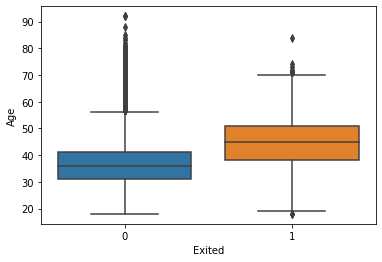

In [46]:
sns.boxplot(data = df_churn_quanti, x='Exited', y='Age')

In [47]:
df_churn_quali['IsActiveMember'].value_counts(normalize = True) * 100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

In [ ]:
df_churn_quali_exited['IsActiveMember'].value_counts(normalize = True) * 100

0    63.917526
1    36.082474
Name: IsActiveMember, dtype: float64

In [ ]:
df_churn_quali['IsActiveMember'].value_counts() 

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [ ]:
df_churn_quali_exited['IsActiveMember'].value_counts() 

0    1302
1     735
Name: IsActiveMember, dtype: int64

In [ ]:
# Membros Inativos dão mais churn

In [ ]:
df_churn_quali['HasCrCard'].value_counts(normalize = True) * 100

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

In [ ]:
df_churn_quali_exited['HasCrCard'].value_counts(normalize = True) * 100

1    69.906726
0    30.093274
Name: HasCrCard, dtype: float64

In [ ]:
df_churn_quali['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [ ]:
df_churn_quali_exited['HasCrCard'].value_counts()

1    1424
0     613
Name: HasCrCard, dtype: int64

In [ ]:
# Ter ou nao cartão de credito nao é tão relevante, pois apesar de 70% das pessoas que dão churn possuiam cartão de crédito
# O universal de quem possui cartão tbm é maior 70%


In [ ]:
df_churn_quali['Gender'].value_counts(normalize = True) * 100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [ ]:
df_churn_quali_exited['Gender'].value_counts(normalize = True) * 100

Female    55.915562
Male      44.084438
Name: Gender, dtype: float64

In [ ]:
# Não foi identificado relação de genero com exited

In [ ]:
df_churn_quanti['NumOfProducts'].value_counts().head(10)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
df_churn_quanti_exited['NumOfProducts'].value_counts().head(10)

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
#Clientes com mais produtos dão mais churn

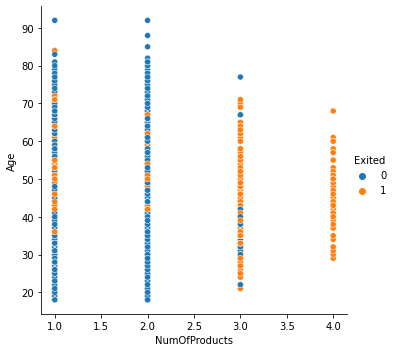

In [ ]:
sns.relplot(data = df_churn, x = 'NumOfProducts', y='Age', hue='Exited')

In [ ]:
# Clientes com numero de produtos entre 3 e 4 dão mais churn, independetemente de sua idade

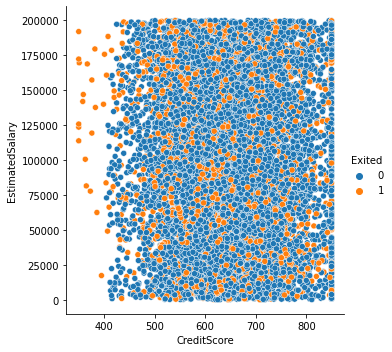

In [ ]:
sns.relplot(data = df_churn, x = 'CreditScore', y='EstimatedSalary', hue='Exited')

In [ ]:
# Clientes com creditscore menor que 400 dão mais churn, independente do valor do seu salário

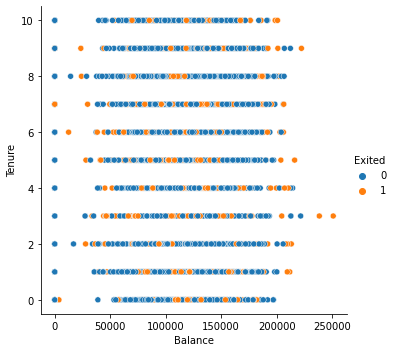

In [ ]:
sns.relplot(data = df_churn, x = 'Balance', y='Tenure', hue='Exited')

In [ ]:
# Nao foi identificado nenhuma relação de churn com Tenure x Balance

In [ ]:
# Perfil de Churn: Germany, idade 40-49 anos, Inativos, número de produtos 3-4, creditscore < 400, 